In [2]:
!pip install beautifulsoup4

In [3]:
from bs4 import BeautifulSoup
import requests

In [4]:
import pandas as pd 

import re

In [5]:
#Llamamos la url 
coches="https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2"
coches_llamada= requests.get(coches)

In [6]:
def estado_llamada():
    if coches_llamada.status_code != 200:
        print ("Error al realizar llamada")
        return None

In [7]:
#Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.

b'<!DOCTYPE html><html><head><meta charSet="UTF-8" class="next-head"/><title class="next-head">Coches de segunda mano, ocasi\xc3\xb3n y seminuevos | OcasionPlus</title><meta name="description" content="4000 coches de ocasi\xc3\xb3n y segunda mano con descuentos de hasta 6000\xe2\x82\xac, la mejor relaci\xc3\xb3n calidad-precio garantizada." class="next-head"/><meta name="robots" content="noindex, follow, noarchive" class="next-head"/><meta name="viewport" content="width=device-width, initial-scale=1.0" class="next-head"/><link rel="shortcut icon" href="/static/favicon/favicon.ico" type="image/x-icon" class="next-head"/><link rel="apple-touch-icon" sizes="180x180" href="/static/favicon/apple-touch-icon.png" class="next-head"/><link rel="icon" type="image/png" sizes="32x32" href="/static/favicon/favicon-32x32.png" class="next-head"/><link rel="icon" type="image/png" sizes="194x194" href="/static/favicon/favicon-194x194.png" class="next-head"/><link rel="icon" type="image/png" sizes="192x
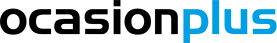

In [8]:
print(coches_llamada.content)

<!DOCTYPE html>
<html><head><meta charset="utf-8" class="next-head"/><title class="next-head">Coches de segunda mano, ocasión y seminuevos | OcasionPlus</title><meta class="next-head" content="4000 coches de ocasión y segunda mano con descuentos de hasta 6000€, la mejor relación calidad-precio garantizada." name="description"/><meta class="next-head" content="noindex, follow, noarchive" name="robots"/><meta class="next-head" content="width=device-width, initial-scale=1.0" name="viewport"/><link class="next-head" href="/static/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link class="next-head" href="/static/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/><link class="next-head" href="/static/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/><link class="next-head" href="/static/favicon/favicon-194x194.png" rel="icon" sizes="194x194" type="image/png"/><link class="next-head" href="/static/favicon/android-chrome-192x192.png" rel=
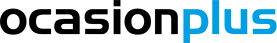

In [9]:
coches_soup= BeautifulSoup(coches_llamada.content, 'html.parser')
print(coches_soup)

In [10]:
nombres_coches=coches_soup.findAll("h2")
print(nombres_coches)

[<h2 style="font-weight:400;padding:0;margin:0;text-align:left;font-size:16px">Tu coche de segunda mano y ocasión al mejor precio (5423)</h2>, <h2 style="overflow-x:hidden">Opel Grandland X 1.2 Turbo Ultimate (130 CV)</h2>, <h2 style="overflow-x:hidden">Jeep Renegade 1.6 Multijet Night Eagle II 4x2 (120 CV)</h2>, <h2 style="overflow-x:hidden">SEAT Ibiza 1.4 TDI Style (105 CV)</h2>, <h2 style="overflow-x:hidden">Kia Ceed 1.4 T-GDi Tech (140 CV)</h2>, <h2 style="overflow-x:hidden">BMW Serie 1 116d (116 CV) Paquete M</h2>, <h2 style="overflow-x:hidden">Citroen C4 130 S&amp;S Feel Pack EAT8 (130 CV)</h2>, <h2 style="overflow-x:hidden">Honda CR-V 2.0 i-MMD Elegance Navi  (184 CV)</h2>, <h2 style="overflow-x:hidden">BMW Serie 1 118i (136 CV)</h2>, <h2 style="overflow-x:hidden">Renault Scenic Zen Energy dCi (130CV)</h2>, <h2 style="overflow-x:hidden">Hyundai Santa Fe 2.2 CRDI Style 4x4 Auto (197 CV) 7 PLAZAS</h2>, <h2 style="overflow-x:hidden">Citroen C4 Picasso Picasso BlueHDi 150cv Intensiv

In [11]:
nombres_coches=coches_soup.findAll("h2")[1:-1]
nombres_coches

[<h2 style="overflow-x:hidden">Opel Grandland X 1.2 Turbo Ultimate (130 CV)</h2>,
 <h2 style="overflow-x:hidden">Jeep Renegade 1.6 Multijet Night Eagle II 4x2 (120 CV)</h2>,
 <h2 style="overflow-x:hidden">SEAT Ibiza 1.4 TDI Style (105 CV)</h2>,
 <h2 style="overflow-x:hidden">Kia Ceed 1.4 T-GDi Tech (140 CV)</h2>,
 <h2 style="overflow-x:hidden">BMW Serie 1 116d (116 CV) Paquete M</h2>,
 <h2 style="overflow-x:hidden">Citroen C4 130 S&amp;S Feel Pack EAT8 (130 CV)</h2>,
 <h2 style="overflow-x:hidden">Honda CR-V 2.0 i-MMD Elegance Navi  (184 CV)</h2>,
 <h2 style="overflow-x:hidden">BMW Serie 1 118i (136 CV)</h2>,
 <h2 style="overflow-x:hidden">Renault Scenic Zen Energy dCi (130CV)</h2>,
 <h2 style="overflow-x:hidden">Hyundai Santa Fe 2.2 CRDI Style 4x4 Auto (197 CV) 7 PLAZAS</h2>,
 <h2 style="overflow-x:hidden">Citroen C4 Picasso Picasso BlueHDi 150cv Intensive</h2>,
 <h2 style="overflow-x:hidden">Smart ForTwo Cabrio (90 CV) PACK BRABUS</h2>,
 <h2 style="overflow-x:hidden">Opel Corsa 1.4 S

In [12]:
precios_coches=[]
precios=coches_soup.findAll("span", {"class": "jsx-2689423372 price"})
for precio in precios:
    precios_coches.append(precio.text)
print(precios_coches)

['17.263€', '15.718€', '11.354€', '17.181€', '17.263€', '17.263€', '27.727€', '25.909€', '15.000€', '16.990€', '14.250€', '18.091€', '9.750€', '21.727€', '13.950€', '22.718€', '12.000€', '41.727€', '25.445€', '16.772€']


In [13]:
precio_original=[]
original=coches_soup.findAll("span",{"class":"jsx-2870186023 priceLast"})
for orig in original:
    precio_original.append(orig.text)
print(precio_original)

['18.990€', '17.290€', '12.490€', '18.900€', '18.990€', '30.500€', '28.500€', '16.500€', '19.900€', '23.900€', '24.990€', '13.200€', '45.900€', '27.990€', '18.450€']


In [44]:
kilometro_coche=[]
kilometro=coches_soup.findAll("span",{"class":"jsx-3960002075 detail big"})[1]
for km in kilometro:
    kilometro_coche.append(km.text.strip())
print(kilometro_coche[1],"km")

51.551 km


In [53]:
tabla_final={"coche":nombres_coches,"precio_rebajado":precios_coches,"precio_original":precio_original,"kilometros":kilometro_coche}

In [56]:
len(tabla_final)

4

In [55]:
df = pd.DataFrame(tabla_final)
#df.columns = ["coche", "precio_rebajado", "precio_original", "kilometros"]

ValueError: All arrays must be of the same length

In [ ]:
for titulo in ["oro", "plata", "bronce"]:
    df[titulo] = pd.to_numeric(df[titulo])
df.head()

In [16]:
precios_coches=coches_soup.find_all(divclass="priceContainer")
print(precios_coches)

[]


In [ ]:
p

In [17]:
tabla_coches=[]
df = pd.DataFrame(lista_paises)
df.columns = ["", "oro", "plata", "bronce"]

NameError: name 'lista_paises' is not defined